In [2]:
# Numpy Crash Course
import numpy as np

alist = [[1,2,3], [4,5,6]]
array = np.array(alist)

print array
print array.shape
print array[1,1]
print array[:,1:]
print array[1,:]

[[1 2 3]
 [4 5 6]]
(2, 3)
5
[[2 3]
 [5 6]]
[4 5 6]


In [3]:
# Matplotlib Crash Course
import matplotlib.pyplot as plt

# line plot
plt.plot(array[1])
plt.xlabel('this is x axis')
plt.ylabel('this is y axis')
plt.show()

# scatter plot 
plt.scatter(array[0], array[1])
plt.xlabel('this is x axis')
plt.ylabel('this is y axis')
plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [4]:
# Pandas Crush Course
import pandas as pd

mylist = np.array([1,2,3])
rownames = ['a', 'b', 'c']
myseries = pd.Series(mylist, index=rownames)
print myseries
print myseries[0]
print myseries['a']

newrows = ['a', 'b']
colnames = ['one','two','three']
mydf = pd.DataFrame(array, index=newrows, columns=colnames)
print '\n'
print mydf
print '\n'
print ('method 1: \n%s') % mydf['one']
print '\n'
print ('method 2: \n%s') % mydf.one


a    1
b    2
c    3
dtype: int64
1
1


   one  two  three
a    1    2      3
b    4    5      6


method 1: 
a    1
b    4
Name: one, dtype: int64


method 2: 
a    1
b    4
Name: one, dtype: int64


In [5]:
# Loading Date Practice

from pandas import read_csv
path = "./Input/diabetes.csv"
data = read_csv(path, header = 0)
print data
print data.shape

"""
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data2 = read_csv(path, header=0)
data2.columns = names
print data2
"""

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
5              5      116             74              0        0  25.6   
6              3       78             50             32       88  31.0   
7             10      115              0              0        0  35.3   
8              2      197             70             45      543  30.5   
9              8      125             96              0        0   0.0   
10             4      110             92              0        0  37.6   
11            10      168             74              0        0  38.0   
12            10      139             

"\nnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']\ndata2 = read_csv(path, header=0)\ndata2.columns = names\nprint data2\n"

In [6]:
# Understand the data
peek = data.head(20)
print peek

print '\n'

types = data.dtypes
print types

print '\n'

from pandas import set_option
set_option('display.width', 100)
set_option('precision', 3)
description = data.describe()
print description

print '\n'

class_count = data.groupby('Outcome').size()
print class_count

print '\n'

correlation = data.corr('pearson')
print correlation

print '\n'
skew = data.skew()
print skew
print 'The skew result show a positive (right) or negative (left) skew. Values closer to zero show less skew.'

    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80            

Histogram


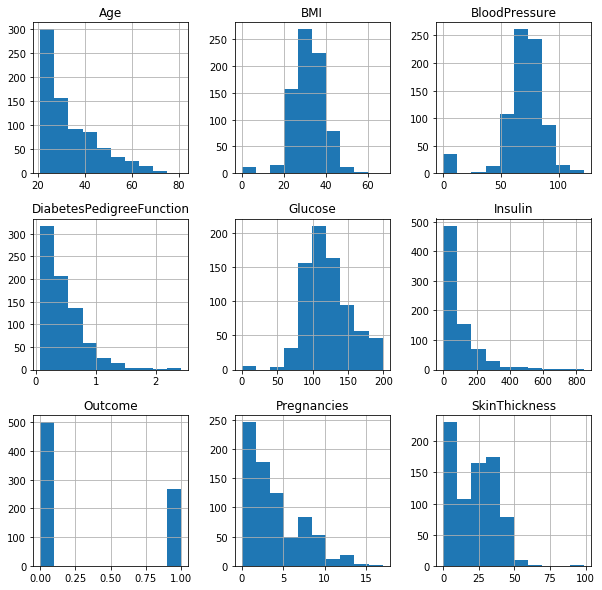

Density Plot


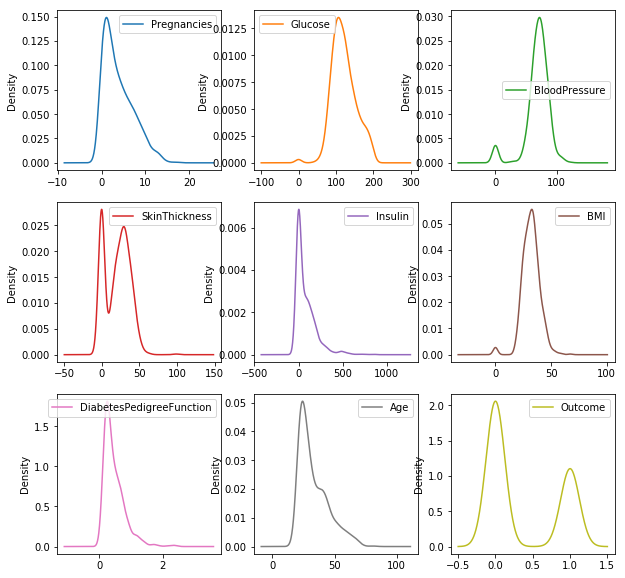

Boxplot


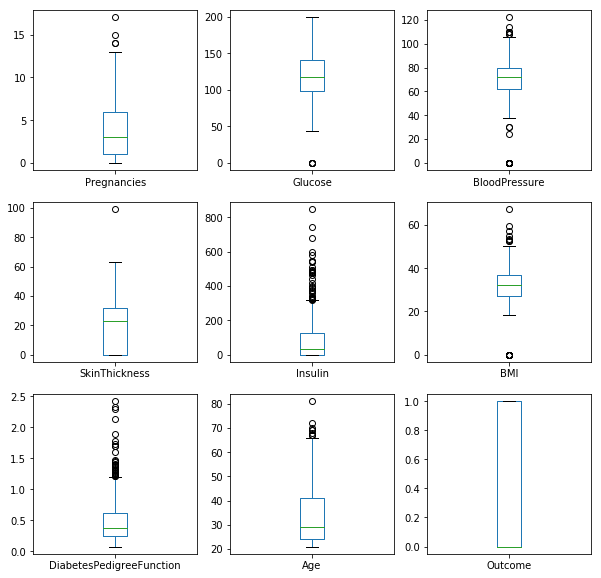

Correlation


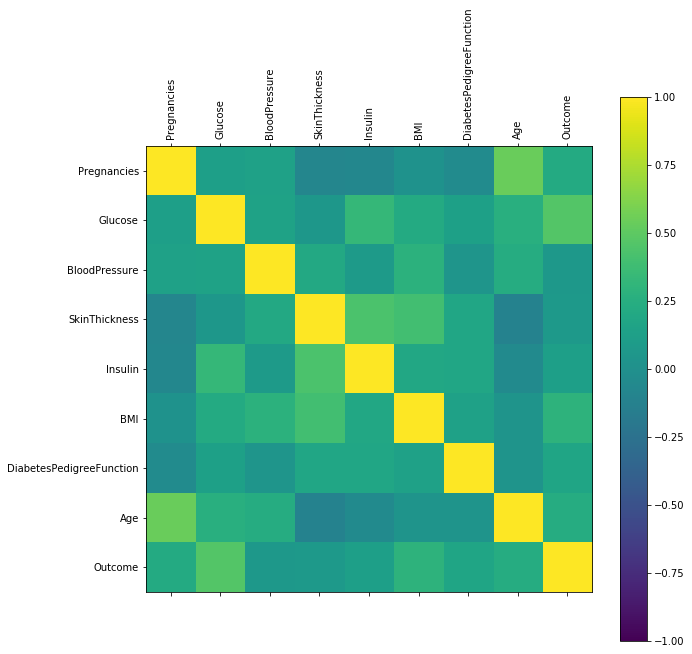

Scatter Plot Matrix


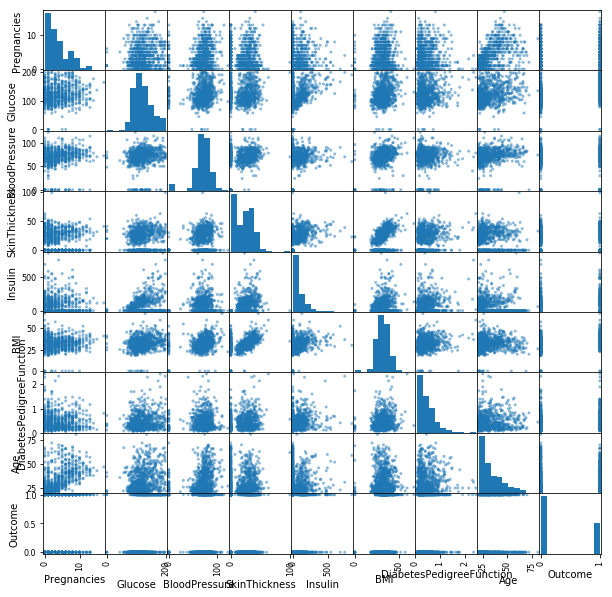

In [7]:
# Data Visualization 

#%matplotlib notebook
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

print 'Histogram'
data.hist()
plt.show()

print 'Density Plot'
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
plt.show()

print 'Boxplot'
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

print 'Correlation'
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlation, vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(data.columns, rotation='vertical')
ax.set_yticklabels(data.columns)
plt.show()

print 'Scatter Plot Matrix'
from pandas.plotting import scatter_matrix
scatter_matrix(data)
plt.show()

In [8]:
# Poreparing the data for ML

# Rescale the data
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

array = data.values
x = array[:, 0:8]
print 'Orignial Data'
print x[0:5,:]
y = array[:,8]
scaler = MinMaxScaler((0,1))
res_x = scaler.fit_transform(x)
set_printoptions(precision=3)
print 'Rescaled Data'
print res_x[0:5,:]

# Standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(x)
res_x = scaler.transform(x)
set_printoptions(precision=3)
print 'Standardized Data'
print res_x[0:5,:]

# Normalize the data 
from sklearn.preprocessing import Normalizer

scaler = Normalizer().fit(x)
res_x = scaler.transform(x)
set_printoptions(precision=3)
print 'Normalized Data'
print res_x[0:5,:]

# Binarize the data
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold = 0.0).fit(x)
by_x = binarizer.transform(x)
set_printoptions(precision=3)
print 'Binarized Data'
print by_x[0:5,:]

Orignial Data
[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]
Rescaled Data
[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]
Standardized Data
[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766

In [9]:
# Feature Selection 

# Univariate Selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x,y)
print 'Summerized scores'
print fit.scores_
features = fit.transform(x)
print 'Selected features: those four with highest scores'
print features[0:5,:]

print '\n'

# Recursive Feature Elemination (RFE)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(x,y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_

print '\n'

# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
fit = pca.fit(x)
print("Explained Variance: %s") % fit.explained_variance_ratio_
print(fit.components_)

print '\n'

# Feature Importance 
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x, y)
print 'the larger the score, the more important the attribute'
print(model.feature_importances_)

Summerized scores
[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
Selected features: those four with highest scores
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


Num Features: 3
Selected Features: [ True False False False False  True  True False]
Feature Ranking: [1 2 3 5 6 1 1 4]


Explained Variance: [0.889 0.062 0.026]
[[-2.022e-03  9.781e-02  1.609e-02  6.076e-02  9.931e-01  1.401e-02
   5.372e-04 -3.565e-03]
 [-2.265e-02 -9.722e-01 -1.419e-01  5.786e-02  9.463e-02 -4.697e-02
  -8.168e-04 -1.402e-01]
 [-2.246e-02  1.434e-01 -9.225e-01 -3.070e-01  2.098e-02 -1.324e-01
  -6.400e-04 -1.255e-01]]


the larger the score, the more important the attribute
[0.111 0.219 0.099 0.075 0.076 0.143 0.124 0.154]


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [10]:
# Evaluate the Performance of Machine Learning Algorithms with Resampling

# Split into Train and Test Sets
print 'Split into Train and Test Sets'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

test_size = 0.33
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = test_size, random_state = seed)
model = LogisticRegression()
model.fit(x_train, y_train)
res = model.score(x_test, y_test) 
print ("Accuracy: %.3f%%") % (res*100.0)
print '\n'

# K-fold Cross Validation
print 'K-fold Cross Validation'
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10 
seed = 7
kfold = KFold(n_splits = num_folds, random_state = seed)
model = LogisticRegression()
res = cross_val_score(model, x, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (res.mean()*100.0, res.std()*100.0)
print '\n'

# Leave One Out Cross Validation
print 'Leave One Out Cross Validation (Time Cosuming)'
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

num_folds = 10
loocv = LeaveOneOut()
model = LogisticRegression()
res = cross_val_score(model, x, y, cv=loocv)
print("Accuracy: %.3f%% (%.3f%%)") % (res.mean()*100.0, res.std()*100.0)
print '\n'

# Repeated Random Test-Train Splits
print 'Repeated Random Test-Train Splits'
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

n_splits = 10
test_size = 0.33
seed = 7
kfold = ShuffleSplit(n_splits = n_splits, test_size = test_size, random_state = seed)
model = LogisticRegression()
res = cross_val_score(model, x, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)") % (res.mean()*100.0, res.std()*100.0)
print '\n'

Split into Train and Test Sets
Accuracy: 75.591%


K-fold Cross Validation
Accuracy: 76.951% (4.841%)


Leave One Out Cross Validation (Time Cosuming)
Accuracy: 76.823% (42.196%)


Repeated Random Test-Train Splits
Accuracy: 76.535% (1.672%)




In [11]:
# Machine Learning Algorithm Performance Metrics

# Classification Accuracy
print 'Classification Accuracy'

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'accuracy'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring) 
print("Accuracy: %.3f (%.3f)") % (results.mean(), results.std())
print '\n'

# Logarithmic Loss
print 'Logarithmic Loss'

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring) 
print("Logloss: %.3f (%.3f)") % (results.mean(), results.std())
print '\n'

# Area Under ROC Curve
print 'Area Under ROC Curve'
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'roc_auc'
results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
print("AUC: %.3f (%.3f)") % (results.mean(), results.std())
print '\n'

# Confusion Matrix
print 'Confusion Matrix'
from sklearn.metrics import confusion_matrix

test_size = 0.33
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
matrix = confusion_matrix(y_test, predicted)
print(matrix)
print '\n'

# Classification Report
print 'Classification Report'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
model = LogisticRegression()
model.fit(x_train, y_train)
predicted = model.predict(x_test)
report = classification_report(y_test, predicted)
print report

# Mean Absolute Error
print 'Mean Absolute Error'
from sklearn.linear_model import LinearRegression
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV', 'BIAS']
h_data = pd.read_csv("./Input/housing.csv", names=names)
h_data = h_data.drop('BIAS', axis = 1)
array = h_data.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_absolute_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("MAE: %.3f (%.3f)") % (results.mean(), results.std())
print '\n'

# Mean Squared Error
print 'Mean Squared Error'
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("MSE: %.3f (%.3f)") % (results.mean(), results.std())
print '\n'

# R2 Metric
print 'R2 Metric'
kfold = KFold(n_splits=10, random_state=7)
model = LinearRegression()
scoring = 'r2'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print("R^2: %.3f (%.3f)") % (results.mean(), results.std())

Classification Accuracy
Accuracy: 0.770 (0.048)


Logarithmic Loss
Logloss: -0.493 (0.047)


Area Under ROC Curve
AUC: 0.824 (0.041)


Confusion Matrix
[[141  21]
 [ 41  51]]


Classification Report
              precision    recall  f1-score   support

         0.0       0.77      0.87      0.82       162
         1.0       0.71      0.55      0.62        92

   micro avg       0.76      0.76      0.76       254
   macro avg       0.74      0.71      0.72       254
weighted avg       0.75      0.76      0.75       254

Mean Absolute Error
MAE: -4.005 (2.084)


Mean Squared Error
MSE: -34.705 (45.574)


R2 Metric
R^2: 0.203 (0.595)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [23]:
# Spot-Check Classification Algorithm

# Linear Machine Learning Algorithms

## Logistic Regression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, x, y, cv=kfold)
print 'Here is the mean estimated accuracy:', results.mean()

## Linear Discriminant Analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
results = cross_val_score(model, x, y, cv=kfold)
print 'Here is the mean estimated accuracy:', results.mean()

# Nonlinear Machine Learning Algorithms 

## k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
results = cross_val_score(model, x, y, cv=kfold)
print 'Here is the mean estimated accuracy:', results.mean()

## Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
results = cross_val_score(model, x, y, cv=kfold)
print 'Here is the mean estimated accuracy:', results.mean()
 
## Classification and Regression Trees (Decision Tree)
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
results = cross_val_score(model, x, y, cv=kfold)
print 'Here is the mean estimated accuracy:', results.mean()

## Support Vector Machines (SVM)
from sklearn.svm import SVC
model = SVC(gamma = 'auto') # could set to 'scale'
results = cross_val_score(model, x, y, cv=kfold)
print 'Here is the mean estimated accuracy:', results.mean()

Here is the mean estimated accuracy: 0.7695146958304853
Here is the mean estimated accuracy: 0.773462064251538
Here is the mean estimated accuracy: 0.7265550239234451
Here is the mean estimated accuracy: 0.7551777170198223
Here is the mean estimated accuracy: 0.6913192071086808
Here is the mean estimated accuracy: 0.6510252904989747


In [32]:
# Spot-Check Regression Algorithms

# Linear Machine Learning Algorithms

## Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

## Ridge Regression (L2)
from sklearn.linear_model import Ridge
model = Ridge()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

## LASSO Regression (L1 - The Least Absolute Shrinkage and Selection Operator)
from sklearn.linear_model import Lasso
model = Lasso()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

## ElasticNet Regression (L1 + L2)
from sklearn.linear_model import ElasticNet
model = ElasticNet()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

# Nonlinear Machine Learning Algorithms

## K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

## Classification and Regression Trees (Decision Tree)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

## Support Vector Machines (SVM)
from sklearn.svm import SVR
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring) 
print 'This is the mean squared error:', results.mean()

This is the mean squared error: -34.705255944524865
This is the mean squared error: -34.078246209259234
This is the mean squared error: -34.46408458830233
This is the mean squared error: -31.164573714249762
This is the mean squared error: -107.28683898039215
This is the mean squared error: -37.45056588235294
This is the mean squared error: -91.04782433324428
